In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create features

x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])


# Create labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

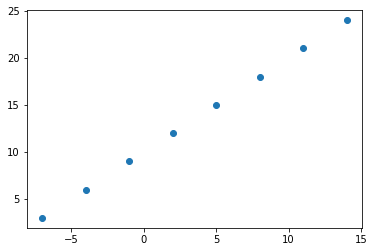

In [4]:
# Visualize 

plt.scatter(x,y)

In [5]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [7]:
# Create a demo tensor for our housing project

house_info = tf.constant(["bedroom","bathroom","garage"])

house_price = tf.constant([939700])

house_price,house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>)

In [8]:
input_shape = x.shape

output_shape = y.shape

input_shape,output_shape

((8,), (8,))

In [9]:
x = tf.constant(x)
y = tf.constant(y)

In [56]:
# Creating a model

tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
    
])

model.compile(loss = tf.keras.losses.mae,
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
metrics = ["mae"])


model.fit(tf.expand_dims(x,axis=-1),y,epochs=135)

Epoch 1/135
1/1 [==============================] - 1s 612ms/step - loss: 13.0472 - mae: 13.0472
Epoch 2/135
1/1 [==============================] - 0s 6ms/step - loss: 12.0616 - mae: 12.0616
Epoch 3/135
1/1 [==============================] - 0s 9ms/step - loss: 11.0659 - mae: 11.0659
Epoch 4/135
1/1 [==============================] - 0s 8ms/step - loss: 10.0558 - mae: 10.0558
Epoch 5/135
1/1 [==============================] - 0s 8ms/step - loss: 9.0255 - mae: 9.0255
Epoch 6/135
1/1 [==============================] - 0s 10ms/step - loss: 7.9690 - mae: 7.9690
Epoch 7/135
1/1 [==============================] - 0s 8ms/step - loss: 6.8800 - mae: 6.8800
Epoch 8/135
1/1 [==============================] - 0s 9ms/step - loss: 6.9895 - mae: 6.9895
Epoch 9/135
1/1 [==============================] - 0s 9ms/step - loss: 7.4368 - mae: 7.4368
Epoch 10/135
1/1 [==============================] - 0s 10ms/step - loss: 7.7723 - mae: 7.7723
Epoch 11/135
1/1 [==============================] - 0s 10ms/step - 

In [57]:
model.predict([17.0])

1/1 [==============================] - 0s 79ms/step


array([[26.845943]], dtype=float32)

In [58]:
model.predict([19.0])

1/1 [==============================] - 0s 43ms/step


array([[28.825579]], dtype=float32)

In [59]:
model.predict([8.0])

1/1 [==============================] - 0s 75ms/step


array([[17.937592]], dtype=float32)

### Evaluate a model

In [3]:
# Create a bigger dataset

x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [4]:
# Create a label

y = x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

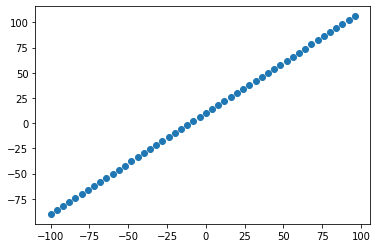

In [5]:
plt.scatter(x,y)

In [6]:
len(x)

50

In [7]:
# Splitting data into training and test splits

x_train = x[:40]
y_train = y[:40]


x_test = x[40:]
y_test = y[40:]


len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

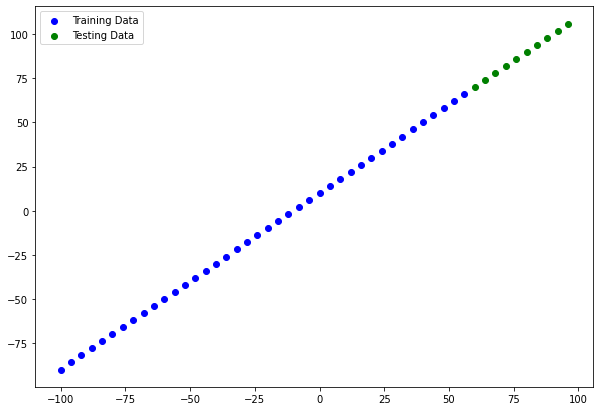

In [8]:
# Visuualizing data

plt.figure(figsize=(10,7))

plt.scatter(x_train,y_train,c="b",label = "Training Data")

plt.scatter(x_test,y_test,c="g",label="Testing Data")

plt.legend();

#### Model summary

In [50]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1),
    
])


model.compile(loss=tf.keras.losses.mae,
optimizer = tf.keras.optimizers.SGD(),
metrics = ["mae"])




In [51]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train,y_train,epochs=100,verbose=0)

### Visualize Model predictions

In [53]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 70.552216],
       [ 75.13993 ],
       [ 79.72766 ],
       [ 84.315384],
       [ 88.90311 ],
       [ 93.490845],
       [ 98.07855 ],
       [102.66628 ],
       [107.25402 ],
       [111.841736]], dtype=float32)

In [54]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [55]:
def plot_predictions(train_data = x_train,train_labels = y_train,test_data = x_test,test_labels  = y_test,predictions = y_pred):

    plt.figure(figsize=(10,7))

    # Plot training data
    plt.scatter(train_data,train_labels,c="b",label="Training Data")

    #Plot test data
    plt.scatter(test_data,test_labels,c="g",label = "Test Data")

    #Plot predictions
    plt.scatter(test_data,predictions,c="r",label="Predictions")


    plt.legend()



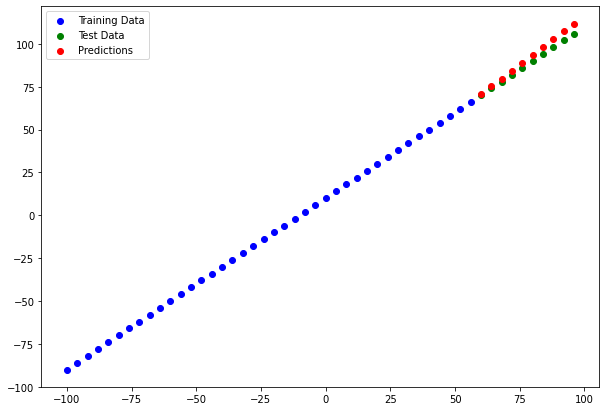

In [56]:
plot_predictions()